In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report,confusion_matrix
from itertools import cycle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
# Set the paths to your dataset directories
train_dir = "C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
val_dir = "C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new"

In [3]:
# Function to list files in a directory
def list_files(directory):
    for root, dirs, files in os.walk(directory):
        for name in files:
            print(os.path.join(root, name))

# List files in train, validation, and test directories
print("Train directory files:")
list_files(train_dir)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Tomato___Septoria_leaf_spot\002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Tomato___Septoria_leaf_spot\0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Tomato___Septoria_leaf_spot\006c018a-bb21-4a24-b1ff-d8b2864a7354___Matt.S_CG 6192.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Tomato___Septoria_leaf_spot\009ce7ca-77de-4e4e-9f59-bec9162df779___Matt.S_CG 7403.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Tomato___Septoria_leaf_spot\00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmente

In [4]:
print("\nValidation directory files:")
list_files(val_dir)


Validation directory files:
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_90deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid\Apple___Apple_scab\01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid\Apple___Apple_scab\0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_90deg.JPG
C:/Users/HP/Desktop/New Plant Disea

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
print("\nTest directory files:")
list_files(test_dir)


Test directory files:
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new\Apple___Apple_scab\0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_270deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new\Apple___Apple_scab\023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487_270deg.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new\Apple___Apple_scab\023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487_new30degFlipLR.JPG
C:/Users/HP/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test_new\Apple___Apple_scab\029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504.JPG
C:/Users/HP/Desktop/New Plant Di

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



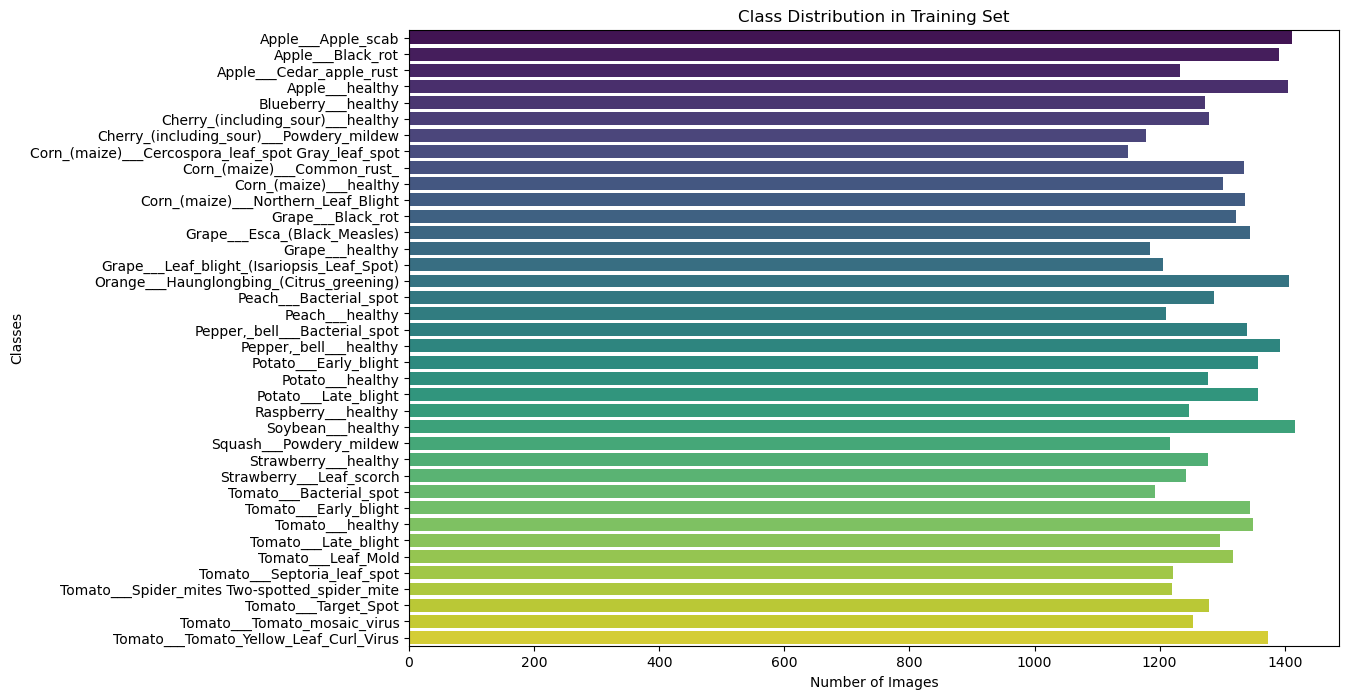

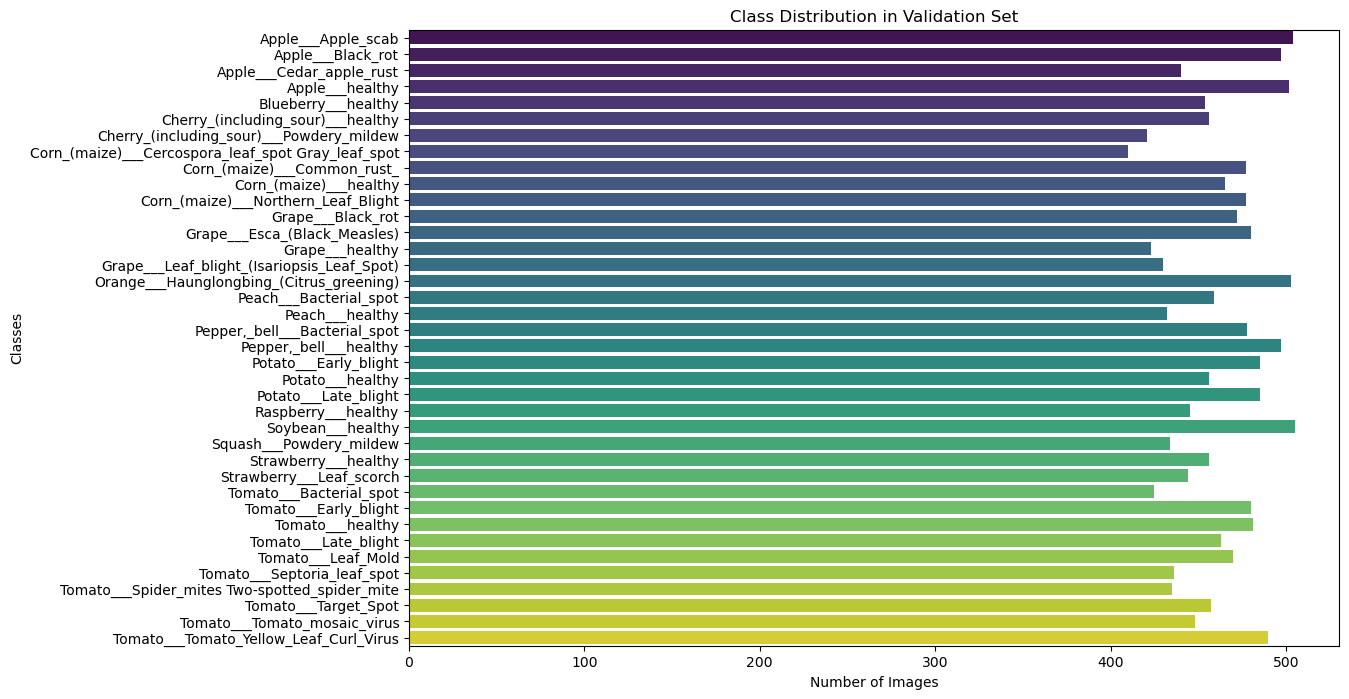

In [6]:
# Data visualization: Class distribution in training set
def plot_class_distribution(directory, title):
    class_counts = {}
    for root, dirs, files in os.walk(directory):
        for name in dirs:
            class_dir = os.path.join(root, name)
            class_counts[name] = len(os.listdir(class_dir))
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts, y=classes, palette='viridis')
    plt.title(title)
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.show()

plot_class_distribution(train_dir, 'Class Distribution in Training Set')
plot_class_distribution(val_dir, 'Class Distribution in Validation Set')


In [7]:

# Image data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generators for validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)



Found 49223 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 21072 images belonging to 38 classes.


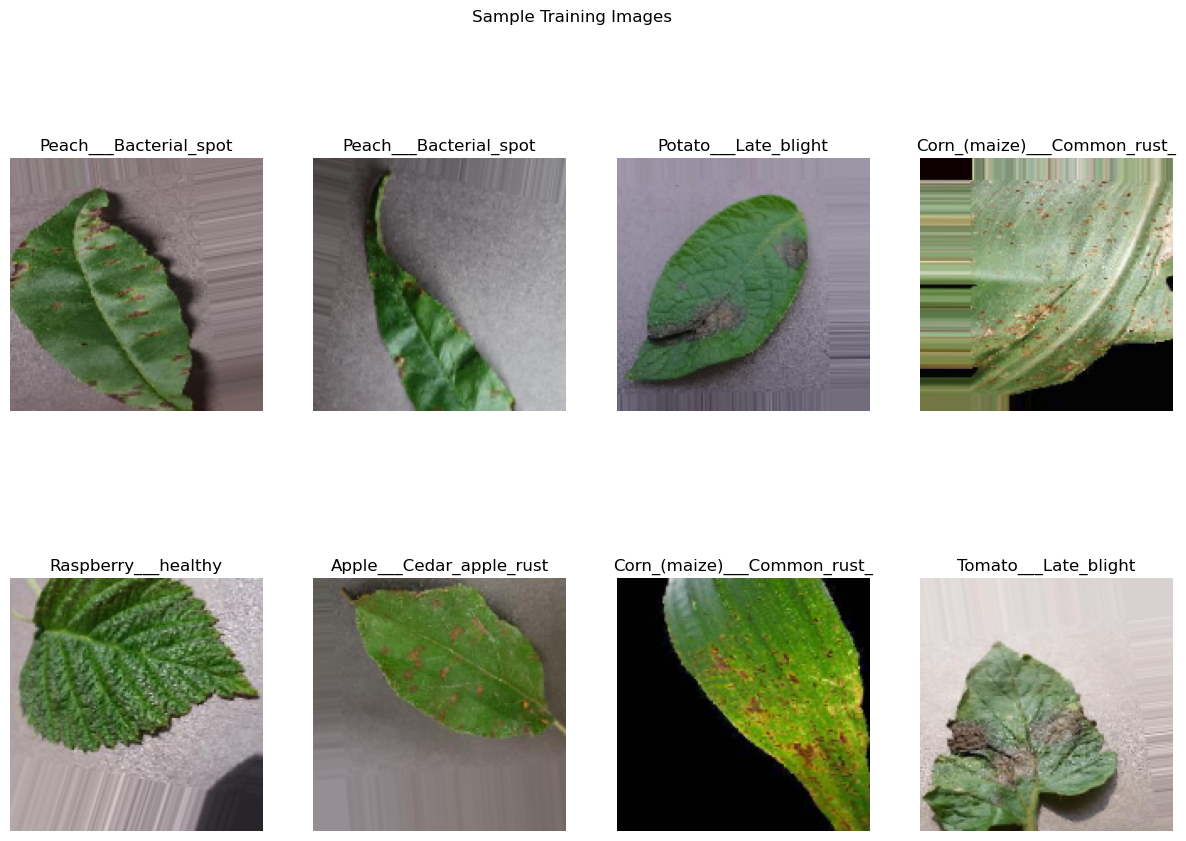

In [8]:
# Data visualization: Sample images with labels
def plot_sample_images(generator, title, num_images=8):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img, label = next(iter(generator))
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(img[0])
        plt.title(list(generator.class_indices.keys())[np.argmax(label[0])])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_sample_images(train_generator, 'Sample Training Images')

In [9]:
# Building the model
model = Sequential([
    tf.keras.Input(shape=(150, 150, 3)),  # Use tf.keras.Input as the first layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(38, activation='softmax')  # Adjusted to the number of classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)],
    epochs=12)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/12


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 718s 465ms/step - accuracy: 0.2255 - loss: 2.8103 - val_accuracy: 0.4907 - val_loss: 1.8091 - learning_rate: 1.0000e-04
Epoch 2/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.5000 - loss: 1.7529 - val_accuracy: 0.7500 - val_loss: 2.5299 - learning_rate: 1.0000e-04
Epoch 3/12


C:\Users\HP\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 715s 464ms/step - accuracy: 0.5950 - loss: 1.3200 - val_accuracy: 0.5841 - val_loss: 1.5210 - learning_rate: 1.0000e-04
Epoch 4/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.5625 - loss: 1.3146 - val_accuracy: 0.2500 - val_loss: 1.8988 - learning_rate: 1.0000e-04
Epoch 5/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 709s 460ms/step - accuracy: 0.6971 - loss: 0.9698 - val_accuracy: 0.6489 - val_loss: 1.2204 - learning_rate: 1.0000e-04
Epoch 6/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.8125 - loss: 0.6974 - val_accuracy: 1.0000 - val_loss: 0.5302 - learning_rate: 1.0000e-04
Epoch 7/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 714s 463ms/step - accuracy: 0.7530 - loss: 0.7796 - val_accuracy: 0.7160 - val_loss: 0.9823 - learning_rate: 1.0000e-04
Epoch 8/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.7188 - loss: 0.8080 - val_accuracy: 0.7500 - val_loss: 2.2409 - learning_rate: 1.0000e-04
Epoch 9/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 712s 4

In [10]:
# Define Transfer Learning Model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Add custom layers on top of the pre-trained model
tl_model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')  
])

# Compile Transfer Learning Model
tl_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

# Train Transfer Learning Model
tl_history = tl_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=12
)

# Evaluate Transfer Learning Model on the test set
tl_test_loss, tl_test_acc = tl_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Transfer Learning Test accuracy: {tl_test_acc:.4f}')

Epoch 1/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 3279s 2s/step - accuracy: 0.3802 - loss: 2.2618 - val_accuracy: 0.8087 - val_loss: 0.6811
Epoch 2/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 2s 181us/step - accuracy: 0.7500 - loss: 0.9112 - val_accuracy: 1.0000 - val_loss: 0.1944
Epoch 3/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 3284s 2s/step - accuracy: 0.6923 - loss: 1.0169 - val_accuracy: 0.8523 - val_loss: 0.4978
Epoch 4/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 2s 147us/step - accuracy: 0.7188 - loss: 0.8824 - val_accuracy: 0.7500 - val_loss: 0.3630
Epoch 5/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 3349s 2s/step - accuracy: 0.7505 - loss: 0.8004 - val_accuracy: 0.8729 - val_loss: 0.4252
Epoch 6/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 2s 200us/step - accuracy: 0.7188 - loss: 0.9665 - val_accuracy: 0.7500 - val_loss: 0.3939
Epoch 7/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 3399s 2s/step - accuracy: 0.7735 - loss: 0.7065 - val_accuracy: 0.8834 - val_loss: 0.3794
Epoch 8/12
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 2s 165us/step - accuracy: 0.7812 -

550/550 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step


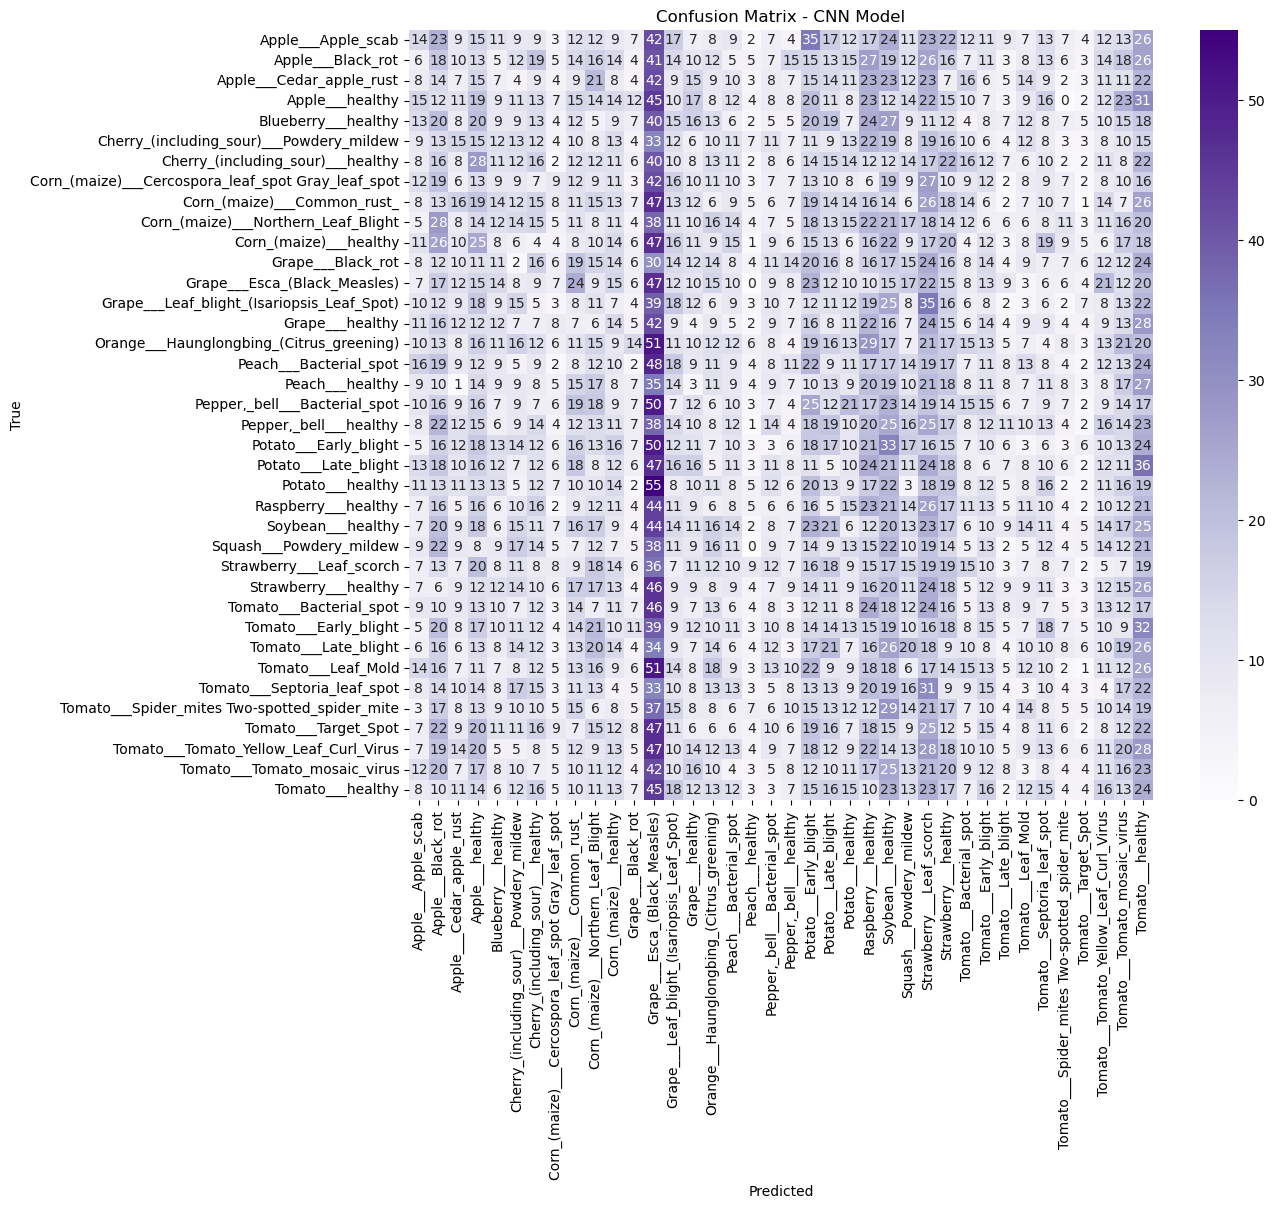

550/550 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step


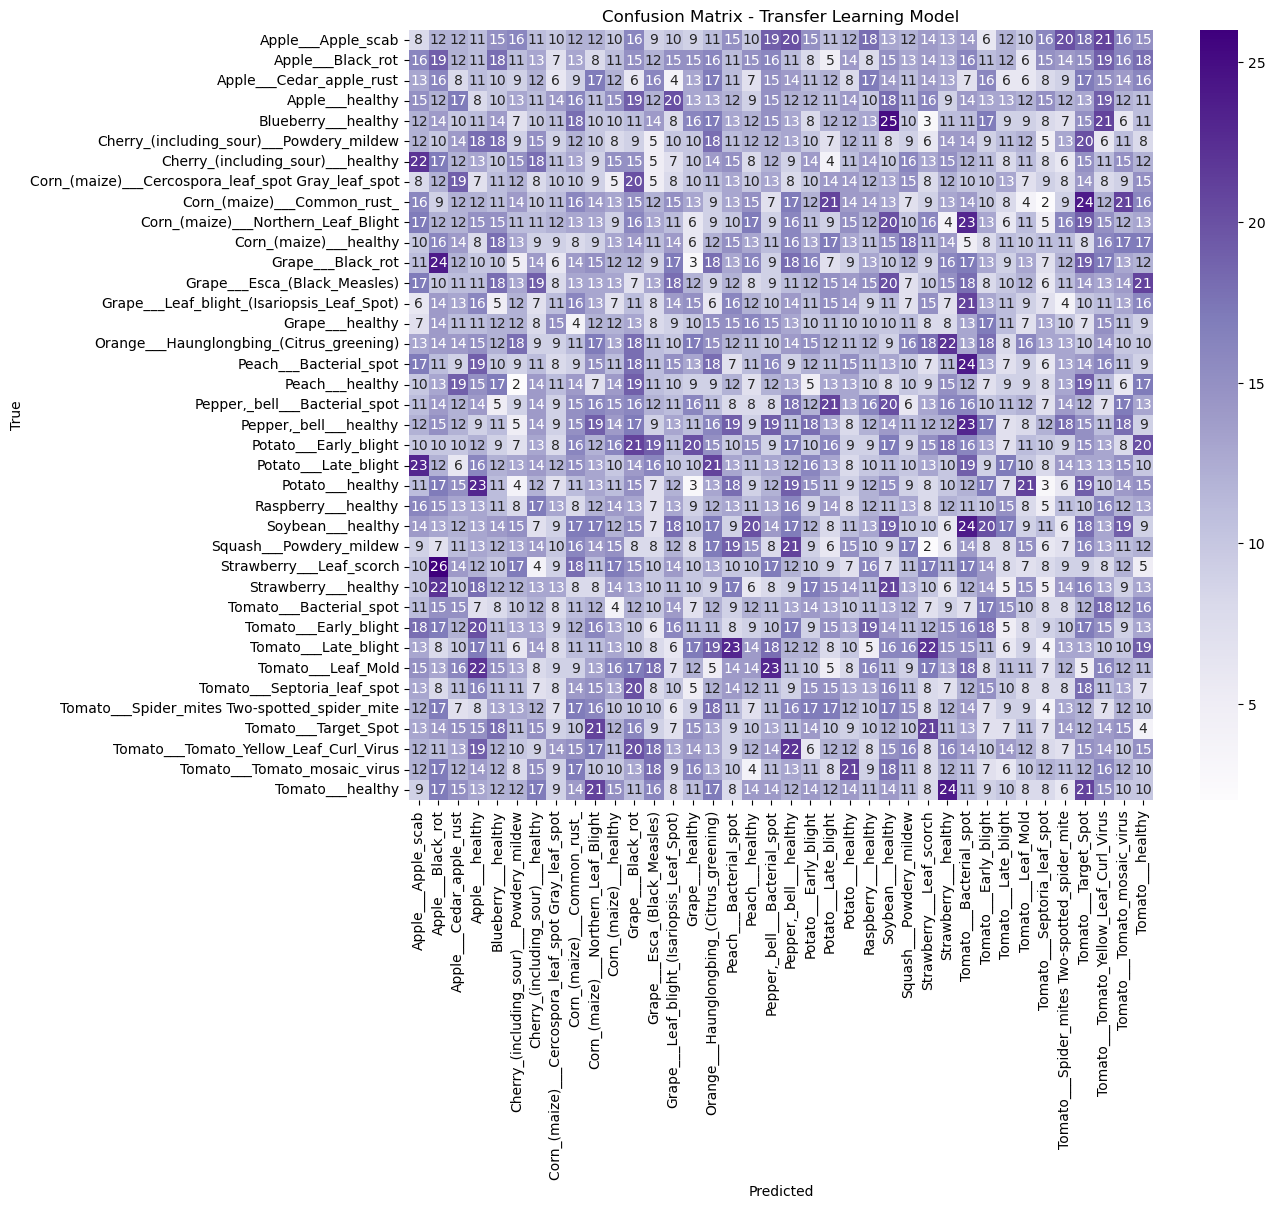

In [11]:
# Function to plot confusion matrix
def plot_confusion_matrix(generator, model, title):
    # Get true labels from the generator
    y_true = generator.classes  
    
    # Predict probabilities for the entire dataset
    steps = int(np.ceil(generator.samples / generator.batch_size))  # Ensure steps is an integer
    y_pred_prob = model.predict(generator, steps=steps, verbose=1)
    
    # Convert predicted probabilities to class labels
    y_pred_classes = np.argmax(y_pred_prob, axis=1)  
    
    # Ensure the prediction output matches the true labels in length
    y_pred_classes = y_pred_classes[:len(y_true)]
    
    # Get class labels
    class_labels = list(generator.class_indices.keys())  
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)  
    
    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for both models using validation data
plot_confusion_matrix(val_generator, model, "CNN Model")
plot_confusion_matrix(val_generator, tl_model, "Transfer Learning Model")

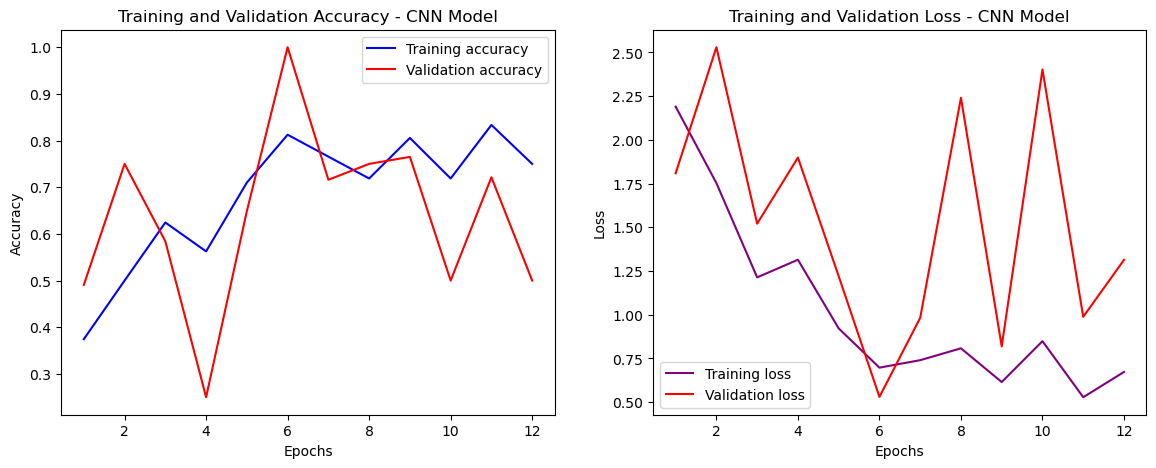

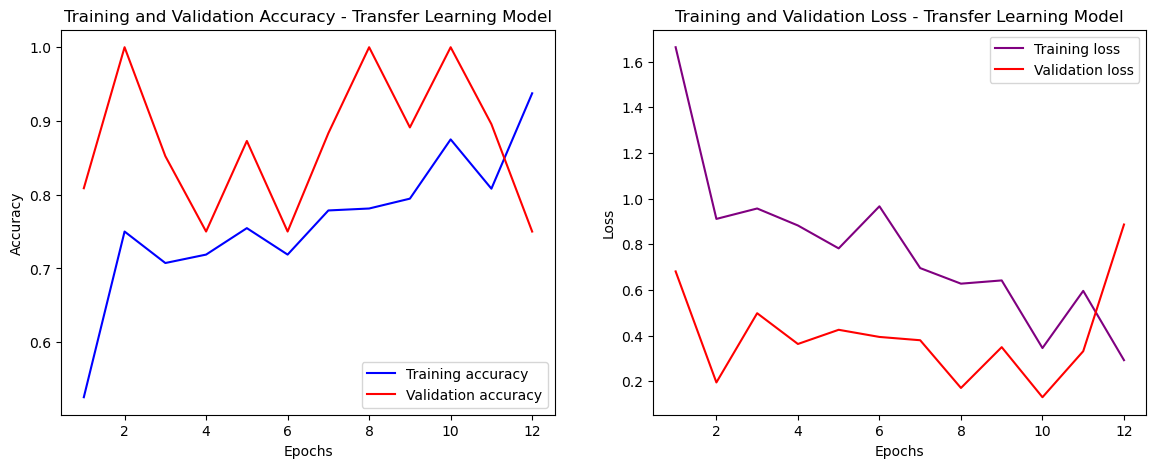

In [15]:
# Function to plot training history
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'purple', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and Validation Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot training history for both models
plot_training_history(history, "CNN Model")
plot_training_history(tl_history, "Transfer Learning Model")